# Mike Hendry's line flight model

This document summarises shortly the (analytic) line flight model from Mike Hendry's master thesis (see [1]). In chapter 4 of this work is an analytic model designed for fly lines in fly fishing presented. The model assumes that the fly line moves parallel to the casting direction, forming a semicircular loop. A unique feature is the consideration of a variable loop radius over time, often observed in fly casting.

The equations are verified with the SymPy library for symbolic mathematics. You can find at the end of the document an implementation of the model in Python using the SciPy library.

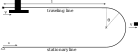

In [5]:
from IPython.display import SVG, display
display(SVG(filename='loop.svg'))


The model consists of a traveling part of the line at the top of the loop, a stationary part of the line at the bottom of the loop and a semicircular transition between these parts. Both the traveling and stationary segments run parallel to each other and the ground. The traveling segment has the same initial velocity as the fly $v_f$. The stationary segment is tethered to a fixed point and has a zero velocity. The angle $\theta$ measures the angle from the top edge to a particle within the semicircular loop.

In [6]:
from sympy import *
init_printing()

First equation relates the length of the traveling portion of the line to the velocity of the line:
$$
  \boxed{\frac{dl}{dt} = -v_l = - \frac{v_f}{2}} \tag{1}
$$

where

$l$ is the length of the traveling portion

$v_f$ is the loop velocity and

$v_l$ is the traveling line velocity



In [7]:
v_f, ldot = symbols("v_f ldot")
eq1 = Eq(ldot, v_f / 2)
eq1

    v_f
l̇ = ───
     2 

The next equation computes the vertical momentum of the semicircular section:
$$
P_v = - \int_{0}^{\pi} \rho_l r^2 sin(\theta)\frac{d\theta}{dt}d\theta\ \tag{2}
$$

In [8]:
P_v, rho_l, r, theta, omega, t = symbols("P_v rho_l r theta omega t")
eq2 = Eq(P_v, - integrate(rho_l * r**2 * omega * sin(theta) , (theta, 0, pi)))
eq2

           2   
Pᵥ = -2⋅ω⋅r ⋅ρₗ

The center of the loop moves forward at a velocity of $v_l = \frac{v_f}{2}$, thus
$$
\omega = \frac{d\theta}{dt} = \frac{v_f}{2 r} \tag{3}
$$ 

In [9]:
eq3 = Eq(omega, v_f / (2 * r))
eq3a = eq2.subs(omega, eq3.rhs)
eq3, eq3a

⎛    v_f                ⎞
⎜ω = ───, Pᵥ = -r⋅ρₗ⋅v_f⎟
⎝    2⋅r                ⎠

The vertical momentum equation can be written therefor as

$$
\boxed{P_v = -\rho_l v_f r} \tag{3a}
$$

The following vertical forces act on the loop

$$
F_{vT} = \frac{4 T}{v_f} \frac{dr}{dt}
$$

$$
dFr = \frac{C_{Dr} A_r \rho_a u_r^2}{2}
$$

$$
dF_\theta = \frac{C_{D\theta} A_\theta \rho_a u_\theta^2}{2}
$$

where 

$C_{Dr}$ is the drag coefficient for perpendicular air flow (form drag),

$C_{D\theta}$ is the drag coefficient for parallel air flow (skin friction),

$A_r = D r (d\theta)$ is the reference area for perpendiculat air flow

$A_\theta = \pi D r (d\theta)$ is the reference area for parallel air flow

Integrating yields the following results for the vertical force components:

$$
F_{vr} = \int_{0}^{\pi} (cos(\theta)) dFr = 0
$$

$$
F_{v\theta} = \int_{0}^{\pi} (cos(\theta)) dF_\theta = k r v_f^2
$$

where 

$$ k = \frac{\pi D C_{D\theta} \rho_a}{3} $$

$F_{vr}$ is the vertical force component due to form drag

$F_{v\theta}$ is the vertical force component due to skin friction



In [10]:
dFr, C_D_r, Ar, rho_a, ur, r, D, dtheta, F_vr = symbols('dFr C_D_r Ar rho_a ur r D dtheta F_vr')
eq = Eq(dFr, (C_D_r * Ar * rho_a * ur**2) / 2)
eq = eq.subs(Ar, D * r * dtheta)
eq = Eq(F_vr, integrate(cos(theta) * eq.rhs, (theta, 0, pi)))
eq

Fᵥᵣ = 0

In [11]:
dFv_theta, C_D_theta, Atheta, rho_a, utheta, r, D, Fv_theta, omega, k = \
    symbols('dFv_theta C_D_theta Atheta rho_a utheta r D Fv_theta omega k')
eq = Eq(dFv_theta, (C_D_theta * Atheta * rho_a * utheta**2) / 2)
eq = eq.subs(Atheta, pi * D * r) # * dtheta
eq = eq.subs(utheta, r * omega * (1 + cos(theta)) ) # Note omega = dtheta / dt
eq = Eq(Fv_theta, integrate(sin(theta) * eq.rhs, (theta, 0, pi)))
eq = eq.subs(omega, eq3.rhs) # Substitute eq3 for omega
# pprint(eq)
eq_ = Eq(k, pi * D * C_D_theta * rho_a / 3) # Assign constants to k
eq = eq.subs(eq_.rhs, k)
eq, eq_

⎛                 2      π⋅C_D_θ⋅D⋅ρₐ⎞
⎜Fvₜₕₑₜₐ = k⋅r⋅v_f , k = ────────────⎟
⎝                             3      ⎠

Now we can express the rate of change of vertical momentum (vertical force) with

$$
F_v = \frac{dF_v}{dt} = \frac{d}{dt}(-\rho_l r v_f) = F_{v\theta} + F_{vT}
$$

$$
-\rho_l ( \frac{dr}{dt} v_f + r \frac{dv_f}{dt} ) = k r v_f^2 + \frac{4 T}{v_f} \frac{dr}{dt} \tag{4}
$$

Hendry assumes that progressive waves in strings travel with the velocity of 

$$
v = \sqrt{\frac{T}{\rho_l}} \tag{5}
$$

solving for the tension $T$ yields

$$
T = \rho_l \frac{v_f^2}{4} \tag{6}
$$

and this is an approximation for the tension at the bottom of the loop.

Combining eq.4 with eq. 6 for tension T yields:

$$
\boxed{\frac{2 \rho_l}{r} \frac{dr}{dt} = -\left( \frac{\rho_l}{v_f} \frac{dv_f}{dt} + k v_f \right)} \tag{7}
$$

In [12]:
T, rho_l, v_f, k = symbols('T rho_l v_f k')

v_f = Function('v_f')(t)
r = Function('r')(t)

T = rho_l * v_f**2 / 4 # eq6

eq4 = Eq(-rho_l * (diff(r, t) * v_f + r * diff(v_f, t) ), k * r * v_f**2 + (4 * T) / v_f * diff(r, t))
eq4 = Eq(diff(r, t), solve(eq4, diff(r, t))[0])
eq7 = Eq(eq4.lhs * 2 * rho_l / r, eq4.rhs * 2 * rho_l / r)
simplify(eq7) # Final derivation of eq7

     d                         d         
2⋅ρₗ⋅──(r(t))               ρₗ⋅──(v_f(t))
     dt                        dt        
───────────── = -k⋅v_f(t) - ─────────────
     r(t)                       v_f(t)   

The total energy of the system can be written as:

$$
E_{total} = E_{kin, tl} + E_{kin, l} + W_{tl} + W_{l} = const
$$

where

$$
E_{kin, tl} =  \frac{1}{2} m_{tl} v_f^2 = \frac{1}{2} \rho_l l v_f^2
$$

is the kinetic energy of the traveling line and

$$
E_{kin, l} =  \frac{1}{4} \pi \rho_l r v_f^2
$$

is the kinetic energy of the loop.

In [13]:
r, theta, v_f, rho_l, E_loop = symbols("r theta vf rho_l E_loop")

# Loop velocity
vl = v_f / 2

# Angular velocity
omega = vl / r

# u_r and u_theta are the instantaneous radial and circumferential velocities
u_r = r * omega * sin(theta)
u_theta = r * omega * (1 - cos(theta))

# Total velocity of a point along the loop
u = sqrt(u_r**2 + u_theta**2)

# Computation of the kinetic energy of the loop
dm = rho_l * r # dm/dtheta mass for a section around the semicircle
dE_loop = (rho_l * r) * u**2 / 2
eqa = Eq(E_loop, integrate(dE_loop, (theta, 0, pi)))

# Alternative derivation: consider the semicircle as rigid body, 
# the kinetic energy is the sum of (linear) kinetic energy and rotational kinetic energy
m_loop = rho_l * (pi * r) # Multiply circumfence by linear mass density

# moment of inertia: integrate for I for all mass points around the semicircle
I_loop = integrate(dm * r**2, (theta, 0, pi))

Ekin = m_loop * vl**2 / 2
Erot = I_loop * omega**2 / 2
eqb = Eq(E_loop, Ekin + Erot)

# Output the result for the two approaches
eqa, eqb

⎛                 2                   2⎞
⎜        π⋅r⋅ρₗ⋅vf           π⋅r⋅ρₗ⋅vf ⎟
⎜Eₗₒₒₚ = ──────────, Eₗₒₒₚ = ──────────⎟
⎝            4                   4     ⎠

The total rate of work (or power) on the traveling line is

$$
P_{tl} = \frac{dW_{tl}}{dt} = l (\frac{\pi D C_{D\theta} \rho_a}{2}) v_f^3
$$

The total rate of work (or power) on the loop due to aerodynamic forces is

$$
P_l = \frac{dW_l}{dt} = \left[ C_{Dr} \frac{r D \rho_a}{12} + C_{D\theta} \frac{5 \rho_a \pi^2 r D}{32} \right] v_f^3
$$

In [14]:
# Derivation of this equation can be found in [Lingard 1988]
r, theta, v_f, D, Wdot_loop, rho_l, E_loop = symbols("r theta v_f D Wdot_loop rho_l E_loop")

# Loop velocity
vl = v_f / 2

# Angular velocity
omega = vl / r

# Reference areas
Ar = D * r
Atheta = pi * D * r

# u_r and u_theta are the instantaneous radial and circumferential velocities
u_r = r * omega * sin(theta)
u_theta = r * omega * (1 - cos(theta))

# See the drag equation https://en.wikipedia.org/wiki/Drag_equation
deltaFR = rho_a * u_r**2 * C_D_r * Ar / 2
deltaFtheta = rho_a * u_theta**2 * C_D_theta * Atheta / 2

# P = Wdot = dW/dt = F * v is the power, see https://en.wikipedia.org/wiki/Power_(physics)
dWRdot = deltaFR * u_r
dWthetadot = deltaFtheta * u_theta

eq = Eq(Wdot_loop, integrate(dWRdot, (theta, 0, pi)) + integrate(dWthetadot, (theta, 0, pi)))
eq

                        3      2                 3
        C_D_r⋅D⋅r⋅ρₐ⋅v_f    5⋅π ⋅C_D_θ⋅D⋅r⋅ρₐ⋅v_f 
Ẇₗₒₒₚ = ───────────────── + ──────────────────────
                12                    32          

When we assume that the total energy stays the same: $E_{total} = const$, it means that the sum of kinetic energy and drag force work doesn't change, leading to the conclusion that the rate of change of total energy over time is zero.
 
$$
\frac{dE_{total}}{dt} = \frac{d}{dt} \left[ \frac{1}{2} \rho_l l v_f^2 + \frac{1}{4} \pi \rho_l r v_f^2 + \int_{0}^{\tau}P_l dt + \int_{0}^{\tau}P_{tl} dt \right] = 0
$$

$$
\frac{d}{dt} \left[ \frac{1}{2} \rho_l l v_f^2 + \frac{1}{4} \pi \rho_l r v_f^2 \right] + P_l + P_{tl} = 0
$$

$$
\frac{d}{dt} \left[ \frac{1}{2} \rho_l l v_f^2 + \frac{1}{4} \pi \rho_l r v_f^2 \right]  = -v_f^3 [ r A + l B] \tag{8}
$$

where

$$
A = ( \frac{D \rho_a}{4} ) ( \frac{C_{Dr}}{3} + \frac{5}{8} \pi^2 C_{D_{\theta}})
$$

$$
B = (\frac{\pi * D * C_{D_\theta} * \rho_a}{2})
$$

$$
\boxed{\frac{\rho_l}{2} \frac{dl}{dt} v_f^2 + \rho_l l v_f \frac{d v_f}{dt} + \frac{\pi \rho_l}{4} \frac{dr}{dt} v_f^2 + \frac{\pi \rho_l}{2} r v_f \frac{d v_f}{dt} = -v_f^3 [ r A + l B]} \tag{9}
$$

In [15]:
rho_l, t, tau, a = symbols('rho_l t tau a')

l = Function('l')(t)
r = Function('r')(t)
v_f = Function('v_f')(t)
P_tl = Function('P_tl')(t)
P_l = Function('P_l')(t)
tau = t # tau is set to the current time

E_tl = Rational(1, 2) * rho_l * l * v_f**2
E_l = Rational(1, 4) * pi * rho_l * r * v_f**2
W_tl = integrate(P_tl, (t, 0, tau)) # Work from start till actual time
W_l = integrate(P_l, (t, 0, tau))

# Coefficients from Hendry's work to simplify P_l ant P_tl page 73
A = (D * rho_a / 4) * (C_D_r /3 + Rational(5,8) * pi**2 * C_D_theta)
B = (pi * D * C_D_theta * rho_a / 2)

# Check for correctness RHS of eq. 8
P_l = (C_D_r * (r * D * rho_a / 12) + C_D_theta * (5 * rho_a * pi**2 * r * D) / 32) * v_f**3
P_tl = l * ((pi * D * C_D_theta) * rho_a) / 2 * v_f**3
eq8rhs_1 = -(P_l + P_tl) 
eq8rhs_2 = -v_f**3 * (r*A + l*B) 

print("The correctness of RHS (eq. 8) is: ", simplify(eq8rhs_1) == simplify(eq8rhs_2))

eq = Eq(diff(E_tl + E_l + W_tl + W_l, t), 0)
eq

The correctness of RHS (eq. 8) is:  True


                                             d                  2    d                  2    d                            
                            π⋅ρₗ⋅r(t)⋅v_f(t)⋅──(v_f(t))   ρₗ⋅v_f (t)⋅──(l(t))   π⋅ρₗ⋅v_f (t)⋅──(r(t))                     
               d                             dt                      dt                      dt                           
ρₗ⋅l(t)⋅v_f(t)⋅──(v_f(t)) + ─────────────────────────── + ─────────────────── + ───────────────────── + Pₗ(t) + Pₜₗ(t) = 0
               dt                        2                         2                      4                               

The equations eq.1, eq. 7, eq. 9 combined are a system of ODEs:

$$
\boxed{\frac{dl}{dt} = -v_l = - \frac{v_f}{2}} \tag{1}
$$

$$
\boxed{\frac{2 \rho_l}{r} \frac{dr}{dt} = -\left( \frac{\rho_l}{v_f} \frac{dv_f}{dt} + k v_f \right)} \tag{7}
$$

$$
\boxed{\frac{\rho_l}{2} \frac{dl}{dt} v_f^2 + \rho_l l v_f \frac{d v_f}{dt} + \frac{\pi \rho_l}{4} \frac{dr}{dt} v_f^2 + \frac{\pi \rho_l}{2} r v_f \frac{d v_f}{dt} = -v_f^3 [ r A + l B]} \tag{9}
$$

In [16]:
# The system functions need to be rearranged to be usable for the ODE solver

from sympy import *

k, l, ldot, v_f, vfdot, r, rdot, rho_l, A, B   = symbols('k l ldot v_f vfdot r rdot rho_l A B')

eq1 = Eq(ldot, -v_f/2)
eq7 = Eq(rdot * (2*rho_l/r) + vfdot*(rho_l / v_f), -k * v_f)
eq9 = Eq(ldot * (rho_l/2 * v_f**2) + rdot * (pi*rho_l / 4 * v_f**2) + vfdot * (rho_l * l * v_f + pi * rho_l / 2 * r * v_f ), -v_f**3 * (r*A + l*B))

eq10 = eq9.subs(rdot, solve(eq7, rdot)[0])
eq11 = eq10.subs(ldot, solve(eq1, ldot)[0])

eq12 = eq9.subs(vfdot, solve(eq7, vfdot)[0])
eq13 = eq12.subs(ldot, solve(eq1, ldot)[0])

eq14 = Eq(vfdot, simplify(solve(eq11, vfdot)[0]))
eq15 = Eq(rdot, simplify(solve(eq13, rdot)[0]))

print("The final system equations are:")
print(eq1)
print(eq14)
print(eq15)
eq1, eq14, eq15

The final system equations are:
Eq(ldot, -v_f/2)
Eq(vfdot, v_f**2*(-8*A*r - 8*B*l + pi*k*r + 2*rho_l)/(rho_l*(8*l + 3*pi*r)))
Eq(rdot, r*v_f*(4*A*r + 4*B*l - 4*k*l - 2*pi*k*r - rho_l)/(rho_l*(8*l + 3*pi*r)))


⎛                   2                                                                                  ⎞
⎜    -v_f        v_f ⋅(-8⋅A⋅r - 8⋅B⋅l + π⋅k⋅r + 2⋅ρₗ)      r⋅v_f⋅(4⋅A⋅r + 4⋅B⋅l - 4⋅k⋅l - 2⋅π⋅k⋅r - ρₗ)⎟
⎜l̇ = ─────, vḟ = ────────────────────────────────────, ṙ = ────────────────────────────────────────────⎟
⎝      2                   ρₗ⋅(8⋅l + 3⋅π⋅r)                              ρₗ⋅(8⋅l + 3⋅π⋅r)              ⎠

In [17]:
import math
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

D = 1.4e-3 # [m] Diameter of the line
rho_l = 1.2e-3 # [kg/m] Linear density of the line
rho_a = 1.2 # [kg/m³] Density of the air
CDr = 1.0 # Form drag coefficient
CDtheta = 0.0027 # Skin friction

A = (D * rho_a / 4.0) * (CDr / 3.0 + 5.0 / 8.0 * math.pi**2 * CDtheta)
B = (math.pi * D * CDtheta * rho_a / 2.0)
k = math.pi * D * CDtheta * rho_a / 3.0

print("A = {:.2e}".format(A))
print("B = {:.2e}".format(B))
print("k = {:.2e}".format(k))

# Inital conditions
x0 = 0 # [m] position of the fly
l0 = 18.43 # [m] inital line length
vf0 = 30.0 # [m/s] fly velocity
r0 = 0.5 # [m] loop radius

def lineFunc(t, y):
    x, l, vf, r = y
    xdot = vf
    ldot = -vf/2
    vfdot = vf**2*(-8*A*r - 8*B*l + math.pi*k*r + 2*rho_l)/(rho_l*(8*l + 3*math.pi*r))
    rdot =  r*vf*(4*A*r + 4*B*l - 4*k*l - 2*math.pi*k*r - rho_l)/(rho_l*(8*l + 3*math.pi*r))
    return (xdot, ldot, vfdot, rdot)

sol = solve_ivp(lineFunc, [0.0, 0.985], [x0, l0, vf0, r0], max_step =1e-3)

x, l, vf, r = sol.y

A = 1.47e-04
B = 7.13e-06
k = 4.75e-06


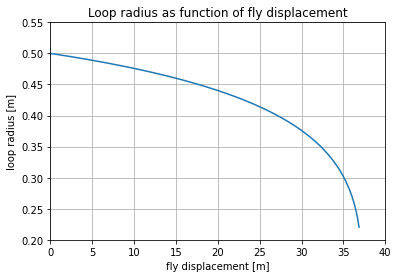

In [18]:
plt.plot(x, r)
plt.title("Loop radius as function of fly displacement")
plt.grid(True)
plt.xlim([0, 40])
plt.ylim([.2, 0.55])
plt.xlabel("fly displacement [m]")
plt.ylabel("loop radius [m]")
plt.show()

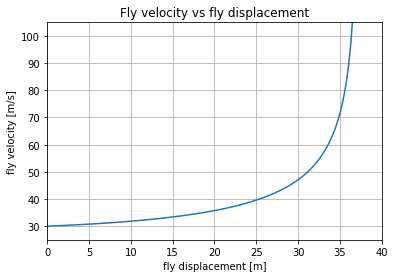

In [19]:
plt.plot(x, vf)
plt.title("Fly velocity vs fly displacement")
plt.grid(True)
plt.xlim([0, 40])
plt.ylim([25, 105])
plt.xlabel("fly displacement [m]")
plt.ylabel("fly velocity [m/s]")
plt.show()

## References

[1] HENDRY, Mike. Measurement and simulation of fly casting dynamics. University of California, Davis, 1999.